In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the csv file
df=pd.read_csv("Wine dataset.csv")

In [3]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Before doing further processing, first check if the dataset has null values or not

In [5]:
df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

### Mutual Information (MI) analysis on your dataset is to measure the dependency between features and the target variable.
Here the target variable is the class

In [25]:
# Separate features and target
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target

In [15]:
# Compute Mutual Information scores
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)
mi_results = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_results

,Feature,MI Score
0,Alcohol,0.474312
1,Malic acid,0.282384
2,Ash,0.079201
3,Alcalinity of ash,0.237806
4,Magnesium,0.213352
5,Total phenols,0.401599
6,Flavanoids,0.667602
7,Nonflavanoid phenols,0.120971
8,Proanthocyanins,0.305406
9,Color intensity,0.548274


Visual representation of how the independent variables are dependent on target variable

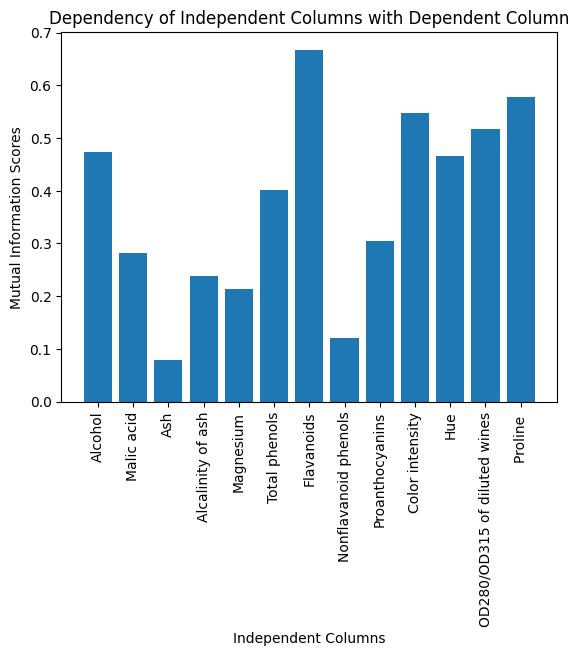

In [57]:
plt.bar(X.columns,mi_scores)
plt.xticks(rotation=90)
plt.xlabel("Independent Columns")
plt.ylabel("Mutual Information Scores")
plt.title("Dependency of Independent Columns with Dependent Column")
plt.show()

Select 9 columns that are highly dependent on target variable

In [53]:
# Select top K features based on MI scores (Change K as needed)
from sklearn.feature_selection import SelectKBest
K = 9  # Number of features to keep
selector = SelectKBest(mutual_info_classif, k=K)
X_selected = selector.fit_transform(X, y)

In [54]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Alcohol', 'Malic acid', 'Total phenols', 'Flavanoids',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

In [55]:
# Create a new DataFrame with selected features
df_selected = pd.DataFrame(X_selected, columns=selected_features)
# Add the target variable back
df_selected["class"] = y

In [56]:
df_selected.head()

,Alcohol,Malic acid,Total phenols,Flavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.80,3.06,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.65,2.76,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.80,3.24,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,3.85,3.49,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.80,2.69,1.82,4.32,1.04,2.93,735.0,1
